### **Problem: Multiclass Classification**

## **Objective: Prediction of Turkish Music Emotion**

# **Introduction**

Source: https://www.kaggle.com/datasets/blaler/turkish-music-emotion-dataset/data

This is a database of music for happy, sad, angry, relax emotions. To prepare the dataset, verbal and non-verbal music are selected from different genres of Turkish music. The dataset is designed as a discrete model, and there are four classes. A total of 100 music pieces are determined for each class in the database to have an equal number of samples in each class. There are 400 samples in the original dataset as 30 seconds from each sample.

Output: 

Song types by emotions: Categorize songs by emotions as Happy / Sad / Angry / Relax.

# **1.Importing libraries and data**

In [1]:
# Exploratory data analysis and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.io import arff
import warnings
warnings.simplefilter("ignore")

# Feature Selection
import mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Models from Scikit-Learn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model evaluations 
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, average_precision_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [2]:
# For fixing random_state parameters
seed = 20

In [3]:
df = pd.read_csv("Acoustic Features.csv")
o_df = df.copy()
df

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,angry,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,angry,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,angry,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,angry,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


# **2.Exploratory data analysis**

#### **2.1.General information about dtypes and null values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

#### **2.2.Number of observations and features**

In [5]:
df.shape

(400, 51)

#### **2.3.Missing values**

In [6]:
df.isna().sum()

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

There are no missing values.

#### **2.4.How many of each song type?**

In [7]:
song_types = df["Class"].value_counts()
song_types_df = pd.DataFrame(song_types)
song_types_df = song_types.reset_index(level = 0)
song_types_df

,Class,count
0,relax,100
1,happy,100
2,sad,100
3,angry,100


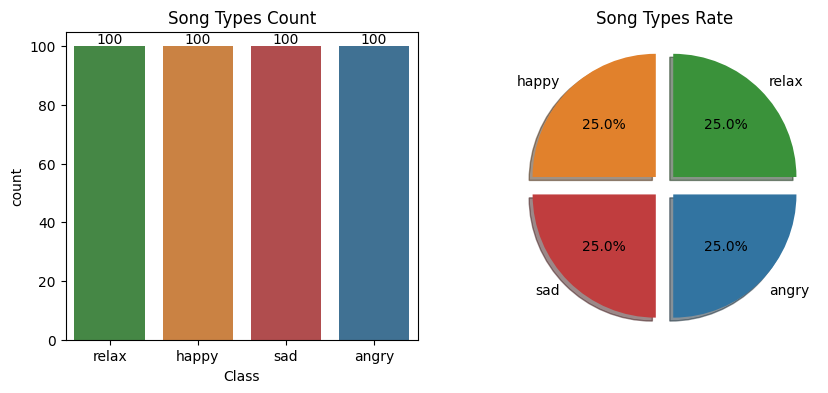

In [8]:
# Plotting risk level counts and rates
cmap = ["#3a923a","#e1812c","#c03d3e","#3274a1","#857aab","#8d7866"]

plt.subplots(1, 2, figsize = (10, 4))
plt.subplot(121)
ax = sns.barplot(data = song_types_df, 
                 x = song_types_df["Class"], 
                 y = song_types_df["count"],
                 palette = cmap)
ax.bar_label(ax.containers[0])
plt.title("Song Types Count");

plt.subplot(122) 
plt.pie(x = song_types, 
        explode = [0.1, 0.1, 0.1, 0.1],
        labels = song_types.index,
        colors = cmap,
        autopct = "%.1f%%", 
        shadow = True)
plt.title("Song Types Rate");

There is a balanced distribution.

#### **2.5.General description of data (count, mean, std, min, max and quartiles)**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,400.0,0.134650,0.064368,0.010,0.08500,0.1280,0.17400,0.431
_Lowenergy_Mean,400.0,0.553605,0.050750,0.302,0.52300,0.5530,0.58325,0.703
_Fluctuation_Mean,400.0,7.145932,2.280145,3.580,5.85950,6.7340,7.82350,23.475
_Tempo_Mean,400.0,123.682020,34.234344,48.284,101.49025,120.1325,148.98625,195.026
_MFCC_Mean_1,400.0,2.456422,0.799262,0.323,1.94850,2.3895,2.86025,5.996
_MFCC_Mean_2,400.0,0.071890,0.537865,-3.484,-0.26275,0.0685,0.41325,1.937
_MFCC_Mean_3,400.0,0.488065,0.294607,-0.870,0.28125,0.4645,0.68600,1.622
_MFCC_Mean_4,400.0,0.030465,0.275839,-1.636,-0.11700,0.0445,0.19825,1.126
_MFCC_Mean_5,400.0,0.178897,0.195230,-0.494,0.06125,0.1810,0.28850,1.055
_MFCC_Mean_6,400.0,0.038307,0.203754,-0.916,-0.07825,0.0495,0.15125,0.799


# **3.Data preprocessing**

#### **3.1.Encoding categorical features**

In [10]:
# "relax": 0, 
# "happy": 1, 
# "sad": 2,
# "angry": 3
emotion_map = {"relax": 0, "happy": 1, "sad": 2, "angry": 3}
df["Class"] = df["Class"].map(emotion_map)
df

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,0,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,0,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,0,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,0,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,0,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,3,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,3,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,3,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


#### **3.2.Splitting**

In [11]:
# Split data into features and target
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [12]:
X

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,0.118,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,0.799,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,0.140,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,0.143,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,0.285,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.174,0.578,5.265,161.144,2.985,0.065,0.718,0.046,0.265,0.104,...,0.374,0.838,0.413,0.125,0.323,0.140,0.120,2.691,0.867,0.969
396,0.176,0.498,5.042,179.787,2.790,-0.148,0.342,-0.011,0.029,0.039,...,0.020,1.000,0.640,0.010,0.233,0.127,0.145,3.364,0.879,0.967
397,0.187,0.557,4.724,134.032,1.672,0.566,0.880,-0.113,0.244,0.214,...,0.052,0.184,0.287,0.101,0.269,0.157,0.111,3.364,0.819,0.962
398,0.140,0.573,4.470,113.600,1.997,-0.210,0.694,0.089,0.206,0.062,...,0.137,1.000,0.304,0.140,0.277,0.144,0.061,3.364,0.811,0.969


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    3
396    3
397    3
398    3
399    3
Name: Class, Length: 400, dtype: int64

In [14]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = seed)

#### **3.3.Standardization**

In [15]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandart = scaler.transform(X_train)
X_testStandart = scaler.transform(X_test)

In [16]:
X_trainStandart, len(X_trainStandart)

(array([[-0.4093998 , -1.41368683, -0.65364412, ...,  0.51515665,
          0.81187046, -0.21614668],
        [-1.02129316, -1.62490877, -0.96967445, ...,  0.17354578,
          1.32440291,  0.80854871],
        [-0.77025999,  0.50651261, -0.43319568, ..., -1.45043615,
         -2.72044782, -0.21614668],
        ...,
        [-1.52335951, -0.51119309,  0.12850044, ...,  1.7081342 ,
          1.04735834,  0.55237486],
        [ 1.30076369, -0.24236517, -0.99855238, ...,  0.17354578,
          1.42136851,  0.04002716],
        [ 1.26938454,  0.37209865, -0.22372899, ..., -0.67888511,
          0.77031377,  0.80854871]]),
 320)

In [17]:
X_testStandart, len(X_testStandart)

(array([[-1.1154306 ,  1.8890562 , -0.37299943, ...,  1.7081342 ,
         -3.10831022,  0.29620101],
        [-0.15836663,  0.39130064,  0.05040801, ...,  0.17354578,
          0.0084412 ,  0.80854871],
        [ 0.13973526,  0.44890662, -0.48403711, ..., -0.43943823,
          0.23007686, -1.49701592],
        ...,
        [-0.29957279,  0.27608868, -0.40919852, ...,  0.51515665,
         -1.08588485, -0.21614668],
        [ 0.78300777,  0.67933056,  0.65399747, ...,  0.51515665,
          0.28548577,  0.29620101],
        [-0.48784767,  0.41050264, -0.07852586, ..., -1.24930078,
         -0.79498805, -0.47232053]]),
 80)

#### **3.4.Feature selection**

In [18]:
feature_names = X.columns
feature_names

Index(['_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3',
       '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7',
       '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11',
       '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean',
       '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean',
       '_Spectralskewness_Mean', '_Spectralkurtosis_Mean',
       '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12',
      

In [19]:
# Create Logistic Regression classifier
logmodel = LogisticRegression(max_iter = 1000)

sfs = SFS(logmodel, 
          k_features = 5,
          forward = True,
          floating = False,
          verbose = 2,
          scoring = "accuracy",
          cv = 10)

feature_names = ('_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3',
       '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7',
       '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11',
       '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean',
       '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean',
       '_Spectralskewness_Mean', '_Spectralkurtosis_Mean',
       '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12',
       '_HarmonicChangeDetectionFunction_Mean',
       '_HarmonicChangeDetectionFunction_Std',
       '_HarmonicChangeDetectionFunction_Slope',
       '_HarmonicChangeDetectionFunction_PeriodFreq',
       '_HarmonicChangeDetectionFunction_PeriodAmp',
       '_HarmonicChangeDetectionFunction_PeriodEntropy')

sbs = sfs.fit(pd.DataFrame(X_train, columns = feature_names), y_train)

# Best features
sbs.subsets_

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.3s

[2023-10-20 12:09:56] Features: 1/5 -- score: 0.478125[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s

[2023-10-20 12:10:00] Features: 2/5 -- score: 0.590625[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    5.0s

[2023-10-20 12:10:06] Features: 3/5 -- score: 0.61875[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    6.5s

[2023-10-20 12:10:13] Features: 4/5 -- score: 0.621875[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    7.3s

[2023-10-20 12:10:21] Features: 5/5 -- score: 0.65

{1: {'feature_idx': (45,),
  'cv_scores': array([0.5    , 0.40625, 0.46875, 0.46875, 0.46875, 0.375  , 0.5625 ,
         0.46875, 0.5625 , 0.5    ]),
  'avg_score': 0.478125,
  'feature_names': ('_HarmonicChangeDetectionFunction_Std',)},
 2: {'feature_idx': (31, 45),
  'cv_scores': array([0.59375, 0.46875, 0.5625 , 0.625  , 0.6875 , 0.5625 , 0.59375,
         0.5625 , 0.59375, 0.65625]),
  'avg_score': 0.590625,
  'feature_names': ('_EntropyofSpectrum_Mean',
   '_HarmonicChangeDetectionFunction_Std')},
 3: {'feature_idx': (31, 45, 48),
  'cv_scores': array([0.71875, 0.5625 , 0.46875, 0.6875 , 0.71875, 0.5625 , 0.59375,
         0.53125, 0.65625, 0.6875 ]),
  'avg_score': 0.61875,
  'feature_names': ('_EntropyofSpectrum_Mean',
   '_HarmonicChangeDetectionFunction_Std',
   '_HarmonicChangeDetectionFunction_PeriodAmp')},
 4: {'feature_idx': (14, 31, 45, 48),
  'cv_scores': array([0.625  , 0.6875 , 0.46875, 0.625  , 0.75   , 0.59375, 0.65625,
         0.46875, 0.6875 , 0.65625]),
  'avg_sc

In [20]:
# Best features
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(45,)","[0.5, 0.40625, 0.46875, 0.46875, 0.46875, 0.37...",0.478125,"(_HarmonicChangeDetectionFunction_Std,)",0.041584,0.055989,0.018663
2,"(31, 45)","[0.59375, 0.46875, 0.5625, 0.625, 0.6875, 0.56...",0.590625,"(_EntropyofSpectrum_Mean, _HarmonicChangeDetec...",0.042099,0.056682,0.018894
3,"(31, 45, 48)","[0.71875, 0.5625, 0.46875, 0.6875, 0.71875, 0....",0.61875,"(_EntropyofSpectrum_Mean, _HarmonicChangeDetec...",0.061232,0.082443,0.027481
4,"(14, 31, 45, 48)","[0.625, 0.6875, 0.46875, 0.625, 0.75, 0.59375,...",0.621875,"(_MFCC_Mean_11, _EntropyofSpectrum_Mean, _Harm...",0.064363,0.086659,0.028886
5,"(14, 31, 44, 45, 48)","[0.65625, 0.6875, 0.4375, 0.625, 0.71875, 0.65...",0.65,"(_MFCC_Mean_11, _EntropyofSpectrum_Mean, _Harm...",0.056662,0.076291,0.02543


In [21]:
# Again splitting for selected features
X_train_select = X_train.iloc[:, [14, 31, 44, 45, 48]]
X_test_select = X_test.iloc[:, [14, 31, 44, 45, 48]]

In [22]:
X_train_select

,_MFCC_Mean_11,_EntropyofSpectrum_Mean,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_PeriodAmp
120,0.131,0.874,0.386,0.176,0.827
361,0.054,0.854,0.384,0.146,0.864
202,0.064,0.751,0.264,0.238,0.572
80,0.054,0.836,0.319,0.185,0.746
76,0.018,0.824,0.307,0.215,0.688
...,...,...,...,...,...
191,0.021,0.910,0.345,0.183,0.787
29,0.051,0.823,0.395,0.295,0.689
154,0.231,0.909,0.289,0.124,0.844
304,0.064,0.879,0.302,0.138,0.871


In [23]:
X_test_select

,_MFCC_Mean_11,_EntropyofSpectrum_Mean,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_PeriodAmp
22,-0.122,0.777,0.292,0.300,0.544
194,0.190,0.885,0.342,0.196,0.769
318,0.004,0.858,0.212,0.121,0.785
157,0.102,0.923,0.332,0.166,0.833
75,0.058,0.794,0.346,0.261,0.741
...,...,...,...,...,...
241,-0.028,0.860,0.387,0.270,0.696
221,0.226,0.876,0.359,0.178,0.822
210,-0.049,0.815,0.371,0.272,0.690
28,-0.028,0.865,0.393,0.199,0.789


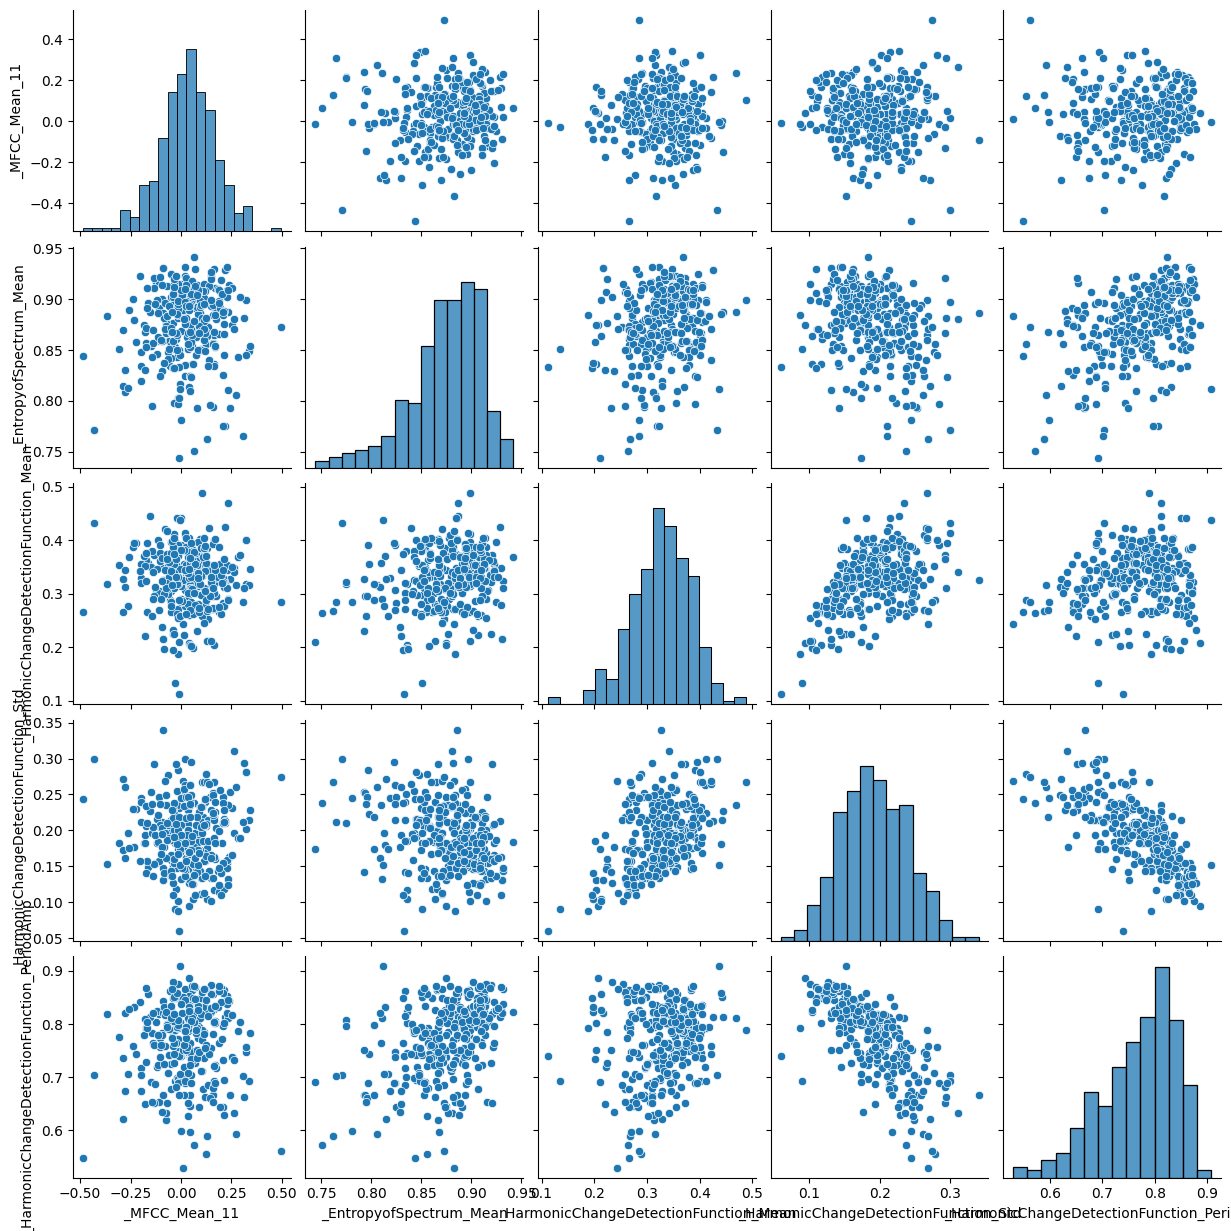

In [24]:
# General distribution of selected features
sns.pairplot(X_train_select.iloc[:,:]);

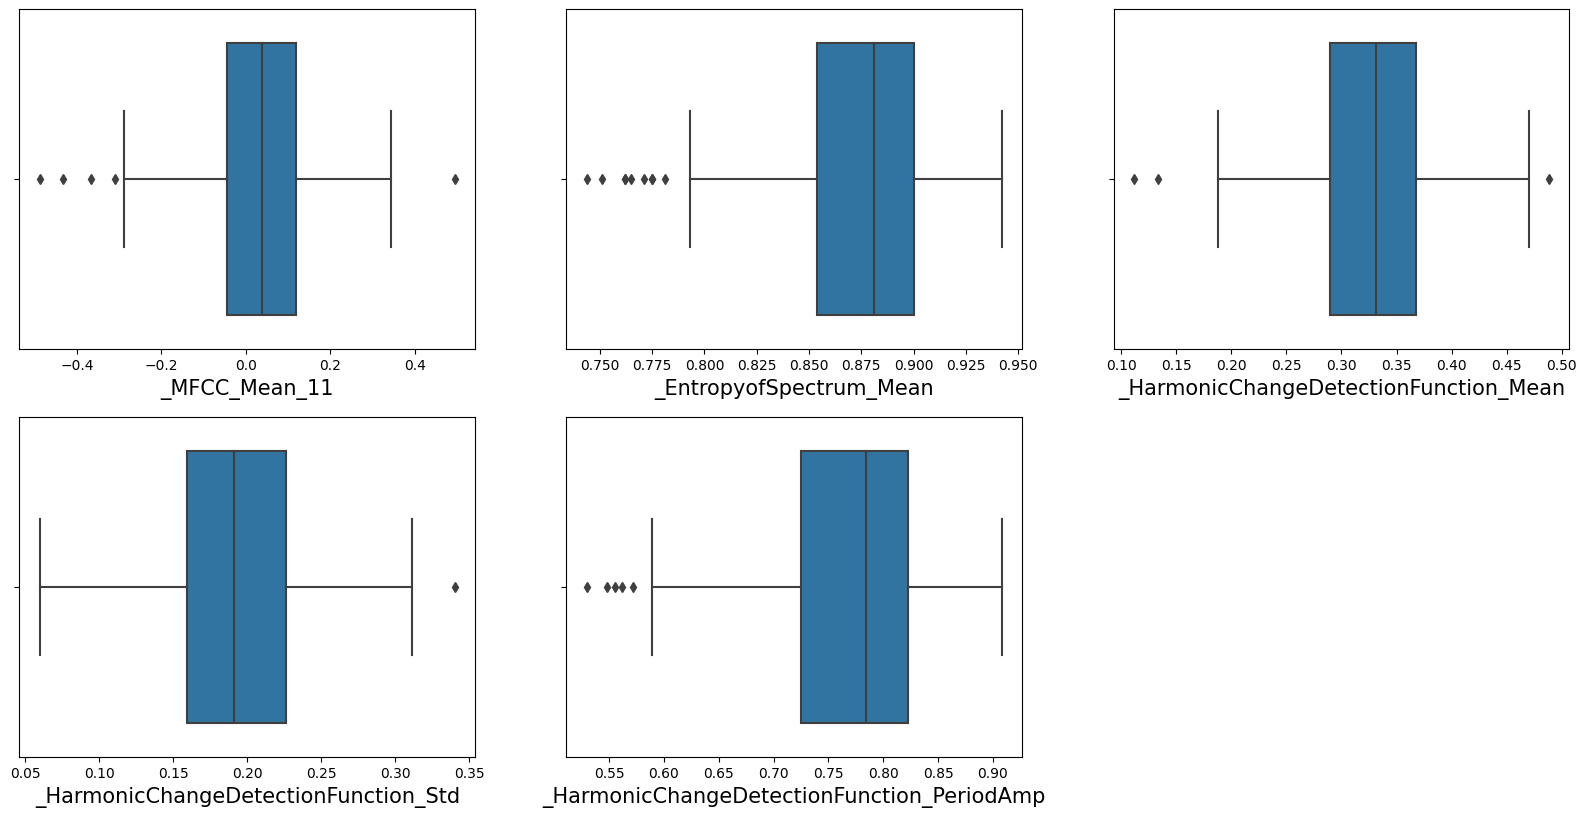

In [25]:
plt.figure(figsize = (20,15))
for i, col in enumerate(X_train_select.iloc[:,:]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = X_train_select.iloc[:,:], x = col)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)

(5.5, -0.5)

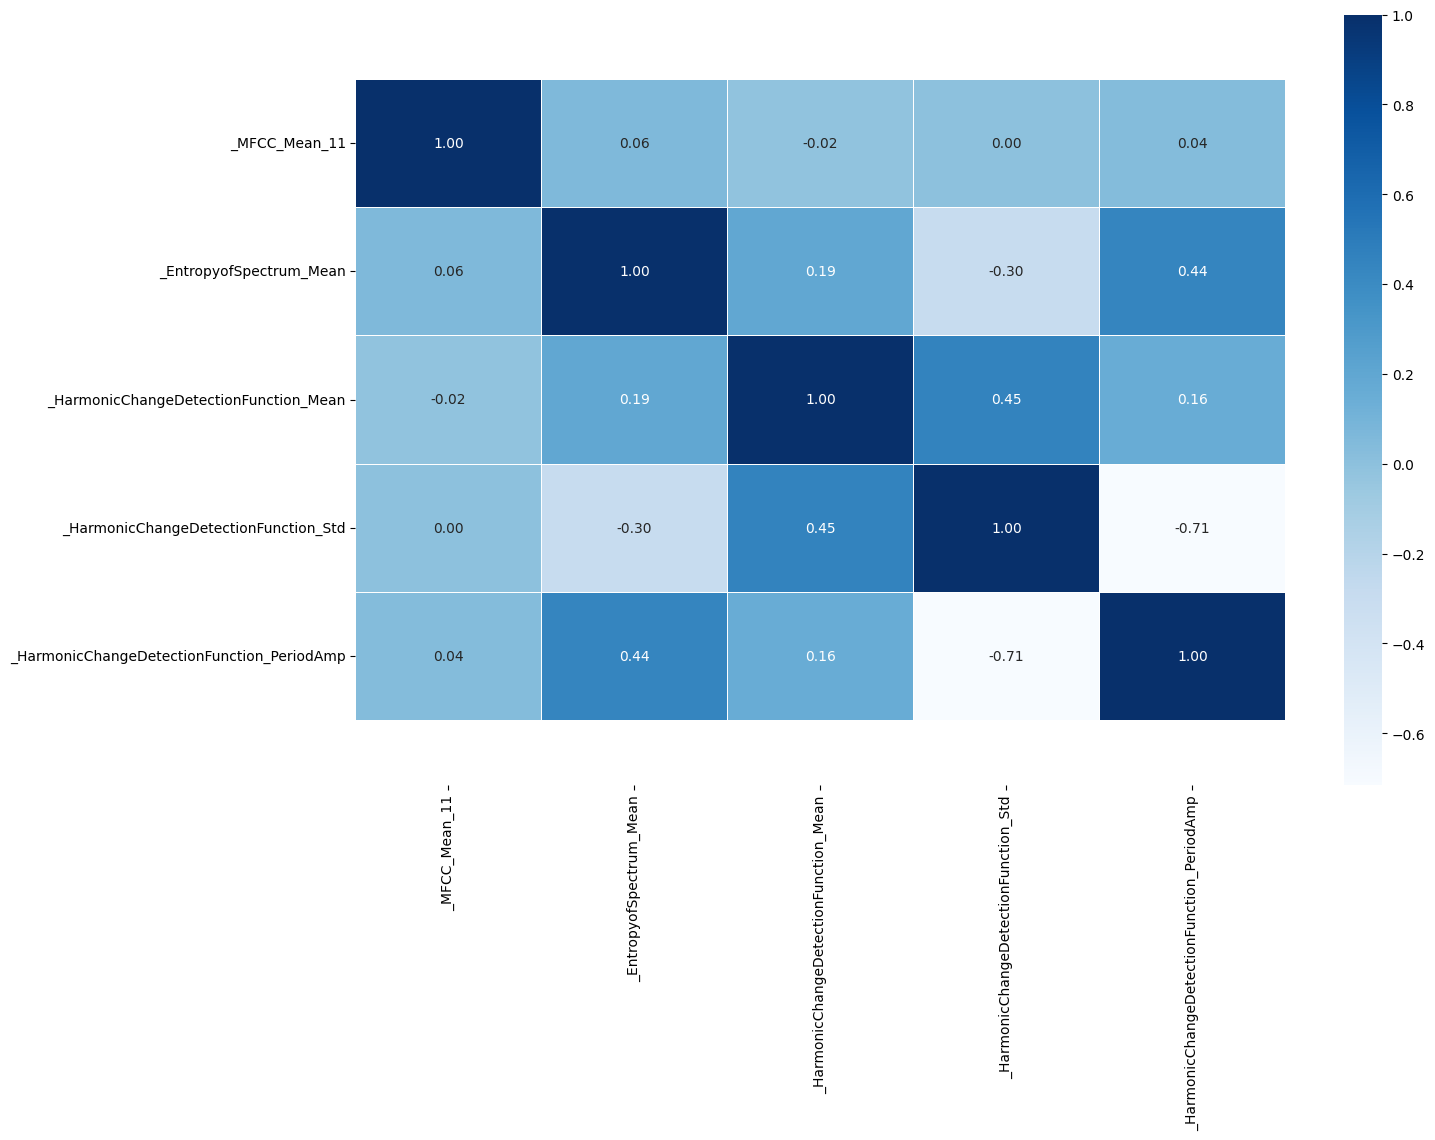

In [26]:
# Correlation matrix
corr_matrix = X_train_select.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "Blues");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# **4.Modelling**

In [27]:
# Classifier comparison with default parameters
scoresCV = []
classifiers = [KNeighborsClassifier(),
               LogisticRegression(random_state = seed),
               RandomForestClassifier(random_state = seed), 
               GradientBoostingClassifier(random_state = seed),
               DecisionTreeClassifier(random_state = seed),
               SVC(random_state = seed),
               XGBClassifier(random_state = seed)
              ]
for classifier in classifiers:
    pipe = make_pipeline(preprocessing.StandardScaler(), classifier)
    scoreCV = cross_val_score(pipe, 
                              X_train_select, 
                              y_train, 
                              scoring = "accuracy", 
                              cv = StratifiedKFold(n_splits = 10, 
                                                   shuffle = True,
                                                   random_state = seed))
    scoresCV.append([classifier, np.mean(scoreCV)])

In [28]:
# Best classifiers according to validation accuracy descending
c_val = pd.DataFrame(scoresCV, columns=["Classifier", "Validation Accuracy"])
c_val_sort = c_val.sort_values(by = "Validation Accuracy", ignore_index = True)
c_val_sort

,Classifier,Validation Accuracy
0,DecisionTreeClassifier(random_state=20),0.625000
1,GradientBoostingClassifier(random_state=20),0.637500
2,KNeighborsClassifier(),0.653125
3,"XGBClassifier(base_score=None, booster=None, c...",0.656250
4,LogisticRegression(random_state=20),0.662500
5,RandomForestClassifier(random_state=20),0.675000
6,SVC(random_state=20),0.703125


#### **4.1.XGB Classifier**

##### **4.1.1.Parameter Tuning**

In [29]:
# Creating model
clf = XGBClassifier(random_state = seed)
# Searching parameters
params = {"n_estimators": [50, 100, 500, 1000],
          "learning_rate": [1, 0.1, 0.01, 0.001]
         }
# Creating grid
xg_clf_grid = RandomizedSearchCV(estimator = clf, 
                                 param_distributions = params,
                                 cv = StratifiedKFold(n_splits = 10, 
                                                      shuffle = True,
                                                      random_state = seed),
                                 n_iter = 10,
                                 verbose = 2, 
                                 scoring = "accuracy",
                                 n_jobs = -1)
# Fit the model
xg_model = xg_clf_grid.fit(X_train_select, y_train)

# Get best parameters
print("Best parameters for XGB model: ", xg_model.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters for XGB model:  {'n_estimators': 1000, 'learning_rate': 0.01}


In [30]:
# Best parameters
xg_best = pd.DataFrame.from_dict(xg_model.best_params_, orient = "index").rename(columns = {0: "Best"})
xg_best

,Best
n_estimators,1000.00
learning_rate,0.01


##### **4.1.2.Building model with best parameters**

In [31]:
xg_clf = XGBClassifier(n_estimators = int(xg_best.iloc[0,0]), 
                       learning_rate = float(xg_best.iloc[1,0]),
                       random_state = seed)
# Fit the model
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

##### **4.1.3.Predictions and model accuracy**

In [32]:
xg_pred = xg_clf.predict(X_test)
xg_acc = accuracy_score(y_test, xg_pred)
print("XGB Model Accuracy:", xg_acc)
xg_acc_tr = xg_clf.score(X_train, y_train)
print("XGB Training Accuracy:", xg_acc_tr)

XGB Model Accuracy: 0.7875
XGB Training Accuracy: 1.0


##### **4.1.4.Other test parameters**

In [33]:
# Classification Report
print("XGB Classification Report\n\n", classification_report(y_test, xg_pred))

XGB Classification Report

               precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.86      0.90      0.88        20
           2       0.61      0.55      0.58        20
           3       0.86      0.90      0.88        20

    accuracy                           0.79        80
   macro avg       0.78      0.79      0.78        80
weighted avg       0.78      0.79      0.78        80



In [34]:
# For comparison list records
xg_recall = recall_score(y_test, xg_pred, average = None)
xg_prec = precision_score(y_test, xg_pred, average = None)
xg_f1 = f1_score(y_test, xg_pred, average = None)

XGB Confusion Matrix


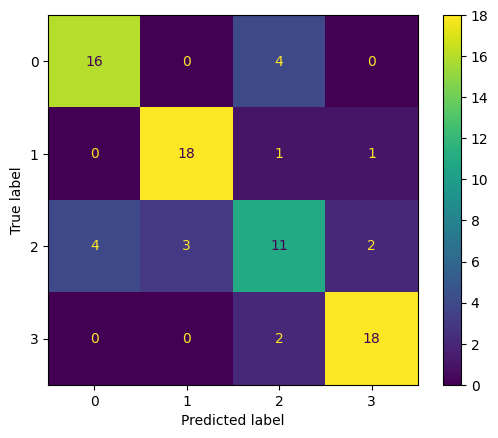

In [35]:
# Confusion matrix
xg_cm = confusion_matrix(y_test, xg_pred, labels = xg_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = xg_cm,
                              display_labels = xg_clf.classes_)
print("XGB Confusion Matrix")
disp.plot()
plt.show();

In [36]:
# Prediction rates
def calculatePredictionRates(model_name, acc, cm):
    print(f"""
    The success rate of the {model_name} model on the test set: {(acc*100):.0f}%
    Relax emotion correct prediction rate: {((cm[0][0]/sum(cm[0]))*100):.0f}%
    Happy emotion correct prediction rate: {((cm[1][1]/sum(cm[1]))*100):.0f}%
    Sad emotion correct prediction rate: {((cm[2][2]/sum(cm[2]))*100):.0f}%
    Angry emotion correct prediction rate: {((cm[3][3]/sum(cm[3]))*100):.0f}%
    """)

In [37]:
# Prediction rates
calculatePredictionRates("XGB", xg_acc, xg_cm)


    The success rate of the XGB model on the test set: 79%
    Relax emotion correct prediction rate: 80%
    Happy emotion correct prediction rate: 90%
    Sad emotion correct prediction rate: 55%
    Angry emotion correct prediction rate: 90%
    


In [38]:
# Train/Test Performance Metrics
def calculatePerformance(classifier, X_train, y_train, X_test, y_test):
    train_pred = classifier.predict(X_train)
    test_pred = classifier.predict(X_test)
    scores = {
        "Train Accuracy": accuracy_score(y_train, train_pred), 
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Train Recall": recall_score(y_train, train_pred, average = None),
        "Test Recall": recall_score(y_test, test_pred, average = None),
        "Train Precision": precision_score(y_train, train_pred, average = None), 
        "Test Precision": precision_score(y_test, test_pred, average = None), 
        "Train F1": f1_score(y_train, train_pred, average = None),
        "Test F1": f1_score(y_test, test_pred, average = None) 
    }
    print("Model Performance Metrics Comparison")
    return scores

In [39]:
# Train/Test Performance Metrics
xg_pm = pd.DataFrame(calculatePerformance(xg_clf, X_train, y_train, X_test, y_test))*100
xg_pm

Model Performance Metrics Comparison


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,100.0,78.75,100.0,80.0,100.0,80.000000,100.0,80.000000
1,100.0,78.75,100.0,90.0,100.0,85.714286,100.0,87.804878
2,100.0,78.75,100.0,55.0,100.0,61.111111,100.0,57.894737
3,100.0,78.75,100.0,90.0,100.0,85.714286,100.0,87.804878


In [40]:
# Creating comparison lists
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_names = []
clf_list = []
pred_list = []
acc_list = []
cm_list = []
f1_list = []
performs = []
prec_list = []
recall_list = []
tr_acc_list = []
# Updating comparison lists
def updateLists(model_name, clf, pred, acc, cm, f1, pm, prec, recall, acc_tr):
    model_names.append(model_name) 
    clf_list.append(clf)
    pred_list.append(pred)
    acc_list.append(acc)
    cm_list.append(cm)
    f1_list.append(f1)
    performs.append(pm)
    prec_list.append(prec)
    recall_list.append(recall)
    tr_acc_list.append(acc_tr)

In [41]:
# Updating comparison lists
updateLists("XGB", xg_clf, xg_pred, xg_acc, xg_cm, xg_f1, xg_pm, xg_prec, xg_recall, xg_acc_tr)

#### **4.2.Logistic Regression Model**

##### **4.4.1.Parameter Tuning**

In [42]:
# Creating pipeline
pipe = Pipeline([("scaler", preprocessing.StandardScaler()),
                 ("Classifier", LogisticRegression(max_iter = 1000, random_state = seed))])
# Searching parameters
params = [{"Classifier__solver": ["liblinear"], 
           "Classifier__penalty": ["l1", "l2"],
           "Classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]
# Creating grid
lr_clf_grid = GridSearchCV(estimator = pipe,
                           param_grid = params,
                           cv = StratifiedKFold(n_splits = 10, 
                                                shuffle = True,
                                                random_state = seed),
                           refit = True,
                           verbose = 2,
                           scoring = "accuracy")
# Fit the model
lr_model = lr_clf_grid.fit(X_train_select, y_train)

# Get best parameters
print("Best parameters for Logistic Regression model: ", lr_model.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END C

In [43]:
# Best parameters
lr_best = pd.DataFrame.from_dict(lr_model.best_params_, orient = "index").rename(columns = {0: "Best"})
lr_best

,Best
Classifier__C,10
Classifier__penalty,l2
Classifier__solver,liblinear


##### **4.2.2.Building model with best parameters**

In [44]:
lr_clf = LogisticRegression(C = float(lr_best.iloc[0,0]),
                            penalty = lr_best.iloc[1,0],
                            solver = lr_best.iloc[2,0],
                            max_iter = 1000, 
                            random_state = seed)
# Fitting the model
lr_clf.fit(X_train, y_train)

LogisticRegression(C=10.0, max_iter=1000, random_state=20, solver='liblinear')

##### **4.2.3.Predictions and model accuracy**

In [45]:
lr_pred = lr_clf.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Model Accuracy:", lr_acc)
lr_acc_tr = lr_clf.score(X_train, y_train)
print("Logistic Regression Training Accuracy:", lr_acc_tr)

Logistic Regression Model Accuracy: 0.775
Logistic Regression Training Accuracy: 0.828125


##### **4.2.4.Other test parameters**

In [46]:
# Classification Report
print("Logistic Regression Classification Report\n\n", classification_report(y_test, lr_pred))

Logistic Regression Classification Report

               precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       0.89      0.85      0.87        20
           2       0.69      0.45      0.55        20
           3       0.89      0.80      0.84        20

    accuracy                           0.78        80
   macro avg       0.79      0.78      0.76        80
weighted avg       0.79      0.78      0.76        80



In [47]:
# For comparison list records
lr_recall = recall_score(y_test, lr_pred, average = None)
lr_prec = precision_score(y_test, lr_pred, average = None)
lr_f1 = f1_score(y_test, lr_pred, average = None)

Logistic Regression Confusion Matrix


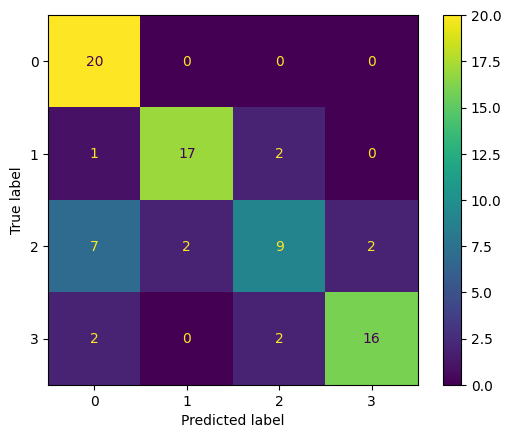

In [48]:
#Confusion matrix
lr_cm = confusion_matrix(y_test, lr_pred, labels = lr_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = lr_cm,
                              display_labels = lr_clf.classes_)
print("Logistic Regression Confusion Matrix")
disp.plot()
plt.show()

In [49]:
# Prediction rates
calculatePredictionRates("Logistic Regression", lr_acc, lr_cm)


    The success rate of the Logistic Regression model on the test set: 78%
    Relax emotion correct prediction rate: 100%
    Happy emotion correct prediction rate: 85%
    Sad emotion correct prediction rate: 45%
    Angry emotion correct prediction rate: 80%
    


In [50]:
# Train/Test Performance Metrics
lr_pm = pd.DataFrame(calculatePerformance(lr_clf, X_train, y_train, X_test, y_test))*100
lr_pm

Model Performance Metrics Comparison


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,82.8125,77.5,83.75,100.0,80.722892,66.666667,82.208589,80.000000
1,82.8125,77.5,95.00,85.0,93.827160,89.473684,94.409938,87.179487
2,82.8125,77.5,72.50,45.0,70.731707,69.230769,71.604938,54.545455
3,82.8125,77.5,80.00,80.0,86.486486,88.888889,83.116883,84.210526


In [51]:
# Updating comparison lists
updateLists("LogisticRegression", lr_clf, lr_pred, lr_acc, lr_cm, lr_f1, lr_pm, lr_prec, lr_recall, lr_acc_tr)

#### **4.3.Random Forest Model**

##### **4.3.1.Parameter Tuning**

In [52]:
# Creating model
clf = RandomForestClassifier(random_state = seed)
# Searching parameters
params = {"n_estimators": [100, 200, 300, 400, 500],
          "max_features": np.arange(1,6),
          "max_depth": [3]
         }
# Creating grid
rf_clf_grid = RandomizedSearchCV(estimator = clf, 
                                 param_distributions = params,
                                 cv = StratifiedKFold(n_splits = 10, 
                                                      shuffle = True,
                                                      random_state = seed),
                                 n_iter = 10,
                                 verbose = 2, 
                                 scoring = "accuracy",
                                 n_jobs = -1)
# Fit the model
rf_model = rf_clf_grid.fit(X_train_select, y_train)

# Get best parameters
print("Best parameters for Random Forest model: ", rf_model.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters for Random Forest model:  {'n_estimators': 500, 'max_features': 2, 'max_depth': 3}


In [53]:
# Best paramaeters
rf_best = pd.DataFrame.from_dict(rf_model.best_params_, orient = "index").rename(columns = {0: "Best"})
rf_best

,Best
n_estimators,500
max_features,2
max_depth,3


##### **4.3.2.Building model with best parameters**

In [54]:
rf_clf = RandomForestClassifier(n_estimators = int(rf_best.iloc[0,0]),
                                max_features = int(rf_best.iloc[1,0]),
                                max_depth = int(rf_best.iloc[2,0]),
                                random_state = seed)
# Fit the model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=500,
                       random_state=20)

##### **4.3.3.Predictions and model accuracy**

In [55]:
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Model Accuracy:", rf_acc)
rf_acc_tr = rf_clf.score(X_train, y_train)
print("Random Forest Training Accuracy:", rf_acc_tr)

Random Forest Model Accuracy: 0.8125
Random Forest Training Accuracy: 0.915625


##### **4.3.4.Other test parameters**

In [56]:
# Classification Report
print("Random Forest Classification Report\n\n", classification_report(y_test, rf_pred))

Random Forest Classification Report

               precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.83      0.95      0.88        20
           2       0.67      0.60      0.63        20
           3       0.94      0.85      0.89        20

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



In [57]:
# For comparison list records
rf_recall = recall_score(y_test, rf_pred, average = None)
rf_prec = precision_score(y_test, rf_pred, average = None)
rf_f1 = f1_score(y_test, rf_pred, average = None)

Random Forest Confusion Matrix


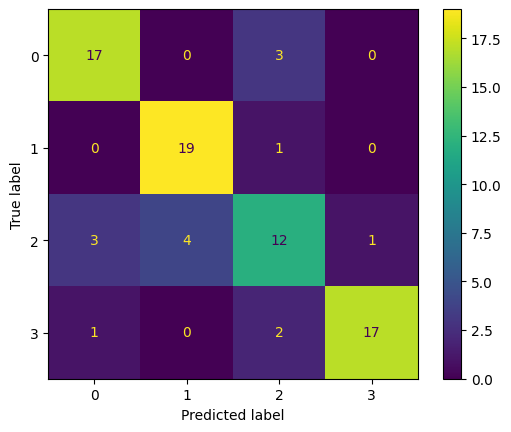

In [58]:
# Confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred, labels = rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm,
                              display_labels = rf_clf.classes_)
print("Random Forest Confusion Matrix")
disp.plot()
plt.show()

In [59]:
# Prediction rates
calculatePredictionRates("Random Forest", rf_acc, rf_cm)


    The success rate of the Random Forest model on the test set: 81%
    Relax emotion correct prediction rate: 85%
    Happy emotion correct prediction rate: 95%
    Sad emotion correct prediction rate: 60%
    Angry emotion correct prediction rate: 85%
    


In [60]:
# Train/Test Performance Metrics
rf_pm = pd.DataFrame(calculatePerformance(rf_clf, X_train, y_train, X_test, y_test))*100
rf_pm

Model Performance Metrics Comparison


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,91.5625,81.25,92.50,85.0,93.670886,80.952381,93.081761,82.926829
1,91.5625,81.25,97.50,95.0,84.782609,82.608696,90.697674,88.372093
2,91.5625,81.25,86.25,60.0,92.000000,66.666667,89.032258,63.157895
3,91.5625,81.25,90.00,85.0,97.297297,94.444444,93.506494,89.473684


In [61]:
# Updating comparison lists
updateLists("RandomForest", rf_clf, rf_pred, rf_acc, rf_cm, rf_f1, rf_pm, rf_prec, rf_recall, rf_acc_tr)

#### **4.4.SVC Model**

##### **4.4.1.Parameter Tuning**

In [62]:
# Creating model pipeline
pipe = Pipeline([("scaler", preprocessing.StandardScaler()),
                 ("Classifier", SVC(random_state = seed))])
# Searching parameters
params = [{"Classifier__kernel": ["rbf", "linear"], 
           "Classifier__gamma": [1, 0.1, 0.01, 0.001],
           "Classifier__C": [1, 10, 100, 1000]}
         ]
# Creating grid
svc_clf_grid = RandomizedSearchCV(estimator = pipe, 
                                  param_distributions = params,
                                  cv = StratifiedKFold(n_splits = 10, 
                                                       shuffle = True,
                                                       random_state = seed),
                                  n_iter = 10,
                                  verbose = 2, 
                                  scoring = "accuracy",
                                  n_jobs = -1)
# Fit the model
svc_model = svc_clf_grid.fit(X_train_select, y_train)

# Get best parameters
print("Best parameters for SVC model: ", svc_model.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters for SVC model:  {'Classifier__kernel': 'rbf', 'Classifier__gamma': 0.001, 'Classifier__C': 1000}


In [63]:
# Best parameters
svc_best = pd.DataFrame.from_dict(svc_model.best_params_, orient = "index").rename(columns = {0: "Best"})
svc_best

,Best
Classifier__kernel,rbf
Classifier__gamma,0.001
Classifier__C,1000


##### **4.4.2.Building model with best parameters**

In [64]:
svc_clf = SVC(kernel = svc_best.iloc[0,0], 
              gamma = float(svc_best.iloc[1,0]),
              C = float(svc_best.iloc[2,0]),
              random_state = seed,
              probability = True)
# Fit the model
svc_clf.fit(X_trainStandart, y_train)

SVC(C=1000.0, gamma=0.001, probability=True, random_state=20)

##### **4.2.3.Predictions and model accuracy**

In [65]:
svc_pred = svc_clf.predict(X_testStandart)
svc_acc = accuracy_score(y_test, svc_pred)
print("SVC Model Accuracy:", svc_acc)
svc_acc_tr = svc_clf.score(X_trainStandart, y_train)
print("SVC Training Accuracy:", svc_acc_tr)

SVC Model Accuracy: 0.7875
SVC Training Accuracy: 1.0


##### **4.2.4.Other test parameters**

In [66]:
# Classification Report
print("SVC Classification Report\n\n", classification_report(y_test, svc_pred))

SVC Classification Report

               precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.89      0.85      0.87        20
           2       0.67      0.60      0.63        20
           3       0.82      0.90      0.86        20

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [67]:
#  For comparison list records
svc_recall = recall_score(y_test, svc_pred, average = None)
svc_prec = precision_score(y_test, svc_pred, average = None)
svc_f1 = f1_score(y_test, svc_pred, average = None)

SVC Confusion Matrix


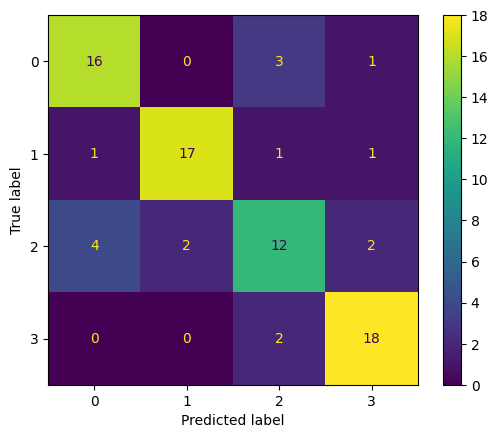

In [68]:
# Confusion matrix
svc_cm = confusion_matrix(y_test, svc_pred, labels = svc_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = svc_cm,
                              display_labels = svc_clf.classes_)
print("SVC Confusion Matrix")
disp.plot()
plt.show();

In [69]:
# Prediction rates
calculatePredictionRates("SVC", svc_acc, svc_cm)


    The success rate of the SVC model on the test set: 79%
    Relax emotion correct prediction rate: 80%
    Happy emotion correct prediction rate: 85%
    Sad emotion correct prediction rate: 60%
    Angry emotion correct prediction rate: 90%
    


In [70]:
# Train/Test Performance Metrics
svc_pm = pd.DataFrame(calculatePerformance(svc_clf, X_trainStandart, y_train, X_testStandart, y_test))*100
svc_pm

Model Performance Metrics Comparison


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,100.0,78.75,100.0,80.0,100.0,76.190476,100.0,78.048780
1,100.0,78.75,100.0,85.0,100.0,89.473684,100.0,87.179487
2,100.0,78.75,100.0,60.0,100.0,66.666667,100.0,63.157895
3,100.0,78.75,100.0,90.0,100.0,81.818182,100.0,85.714286


In [71]:
# Updating comparison lists
updateLists("SVC", svc_clf, svc_pred, svc_acc, svc_cm, svc_f1, svc_pm, svc_prec, svc_recall, svc_acc_tr)

# **5.Model Comparison**

#### **5.1.Comparison of all metrics and models**

In [72]:
def compare_metrics_barplot(comparison_list, model_list, metric_list, color_list):
    size = range(len(model_list))
    color_list = cmap
    w = 0.15    
    
    # Selecting metrics one by one for all models
    def select_metrics(comparison_list, metric_list):
        row_list = []
        for metric in metric_list:
            row_out = list(comparison_list.loc[metric])
            row_list.append(row_out)
        return row_list
    
    y = select_metrics(comparison_list, metric_list)
    
    # Figure size
    plt.figure(figsize = (10, 5))
    # Positions, colors, labels and axes
    for i in range(len(metric_list)):
        plt.bar([pos + (i * w) for pos in size], 
                y[i], 
                width = w, 
                align = "center", 
                label = metric_list[i],
                color = color_list[i]) 
    # Display plot    
    plt.xlabel("Metrics")
    plt.ylabel("Rate")
    plt.title("All Metrics Comparison by Model's Built Order")
    plt.xticks([pos + (1 * w) for pos in size], model_list, rotation = 90)
    plt.yticks(np.arange(0, 105, 5))
    plt.legend(bbox_to_anchor = (1, 1), loc = "best")
    plt.show()

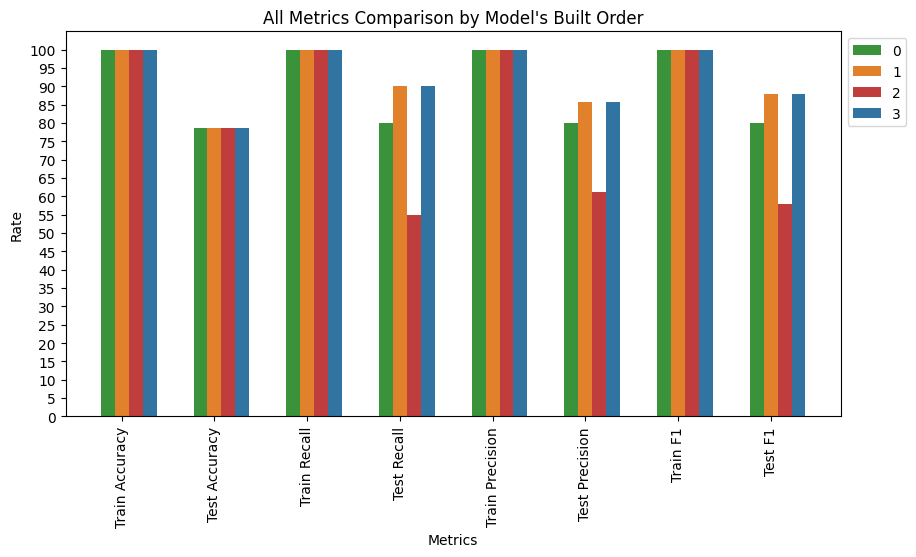

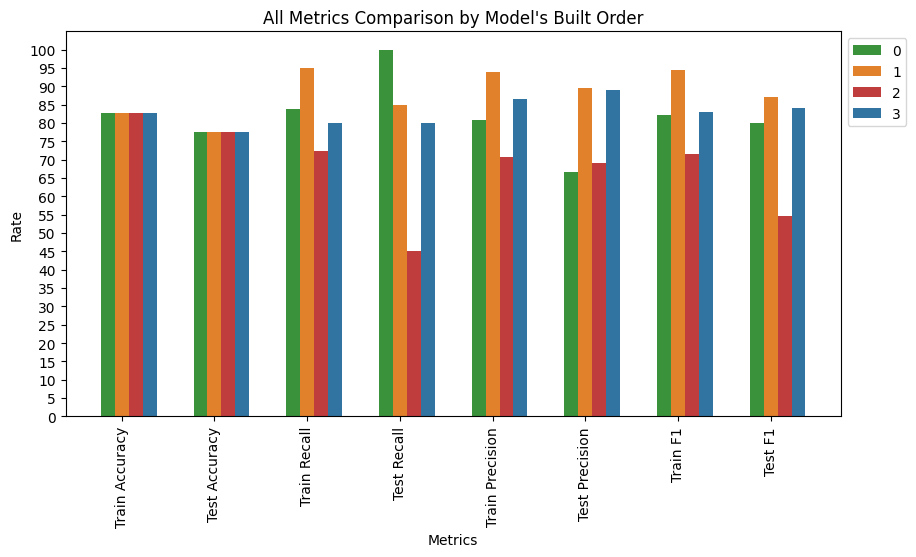

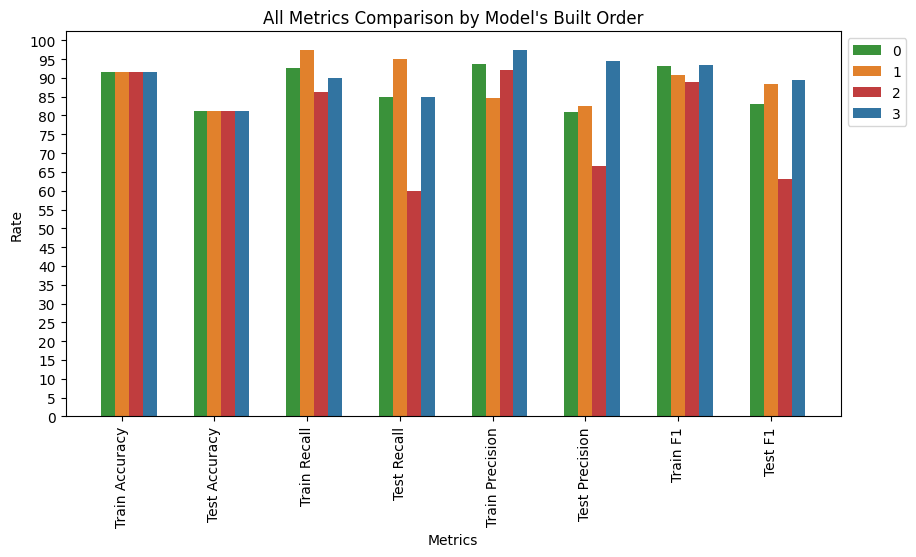

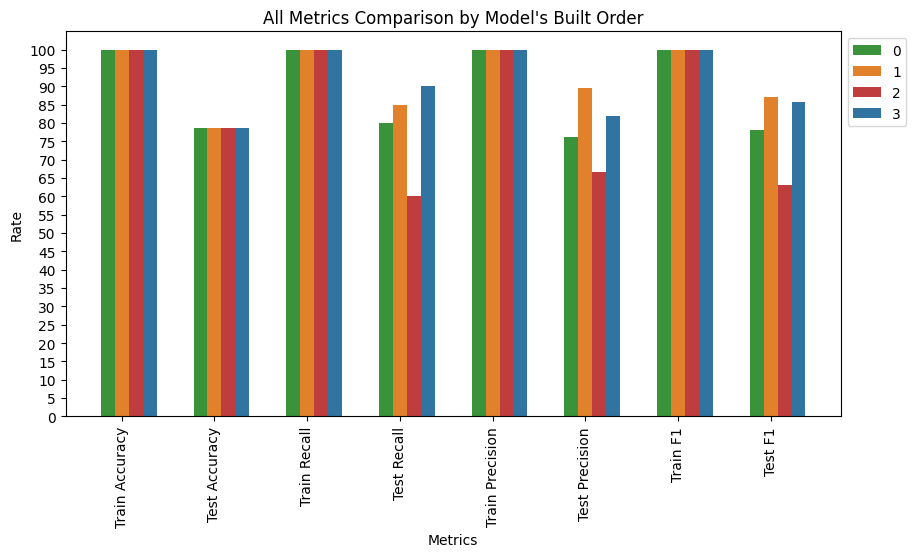

In [73]:
for p in performs:
    compare_metrics_barplot(p, p.columns.to_list(), p.index.to_list(), cmap)

#### **5.2.Comparison of models test & training accuracies**

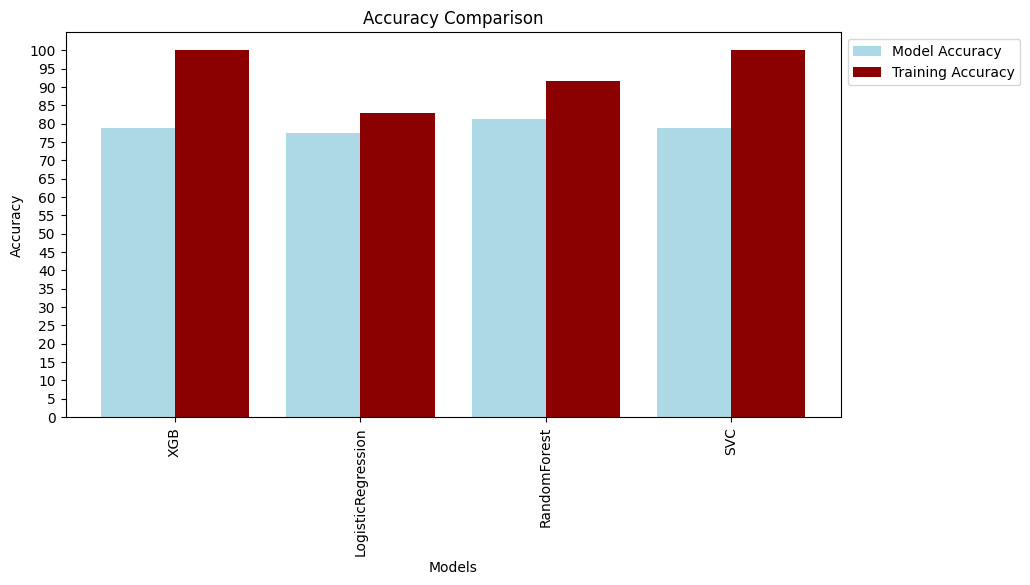

In [74]:
plt.figure(figsize = (10, 5))

plt.bar(np.arange(len(model_names)) - 0.2, 
        np.array(acc_list)*100, 0.4, label = "Model Accuracy", color = "lightblue") 
plt.bar(np.arange(len(model_names)) + 0.2, 
        np.array(tr_acc_list)*100, 0.4, label = "Training Accuracy", color = "darkred") 
plt.xticks(np.arange(len(model_names)), model_names, rotation = 90)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.yticks(np.arange(0, 105, 5))
plt.legend(bbox_to_anchor = (1, 1), loc = "best")
plt.show()

#### **5.3.Comparison of confusion matrices**

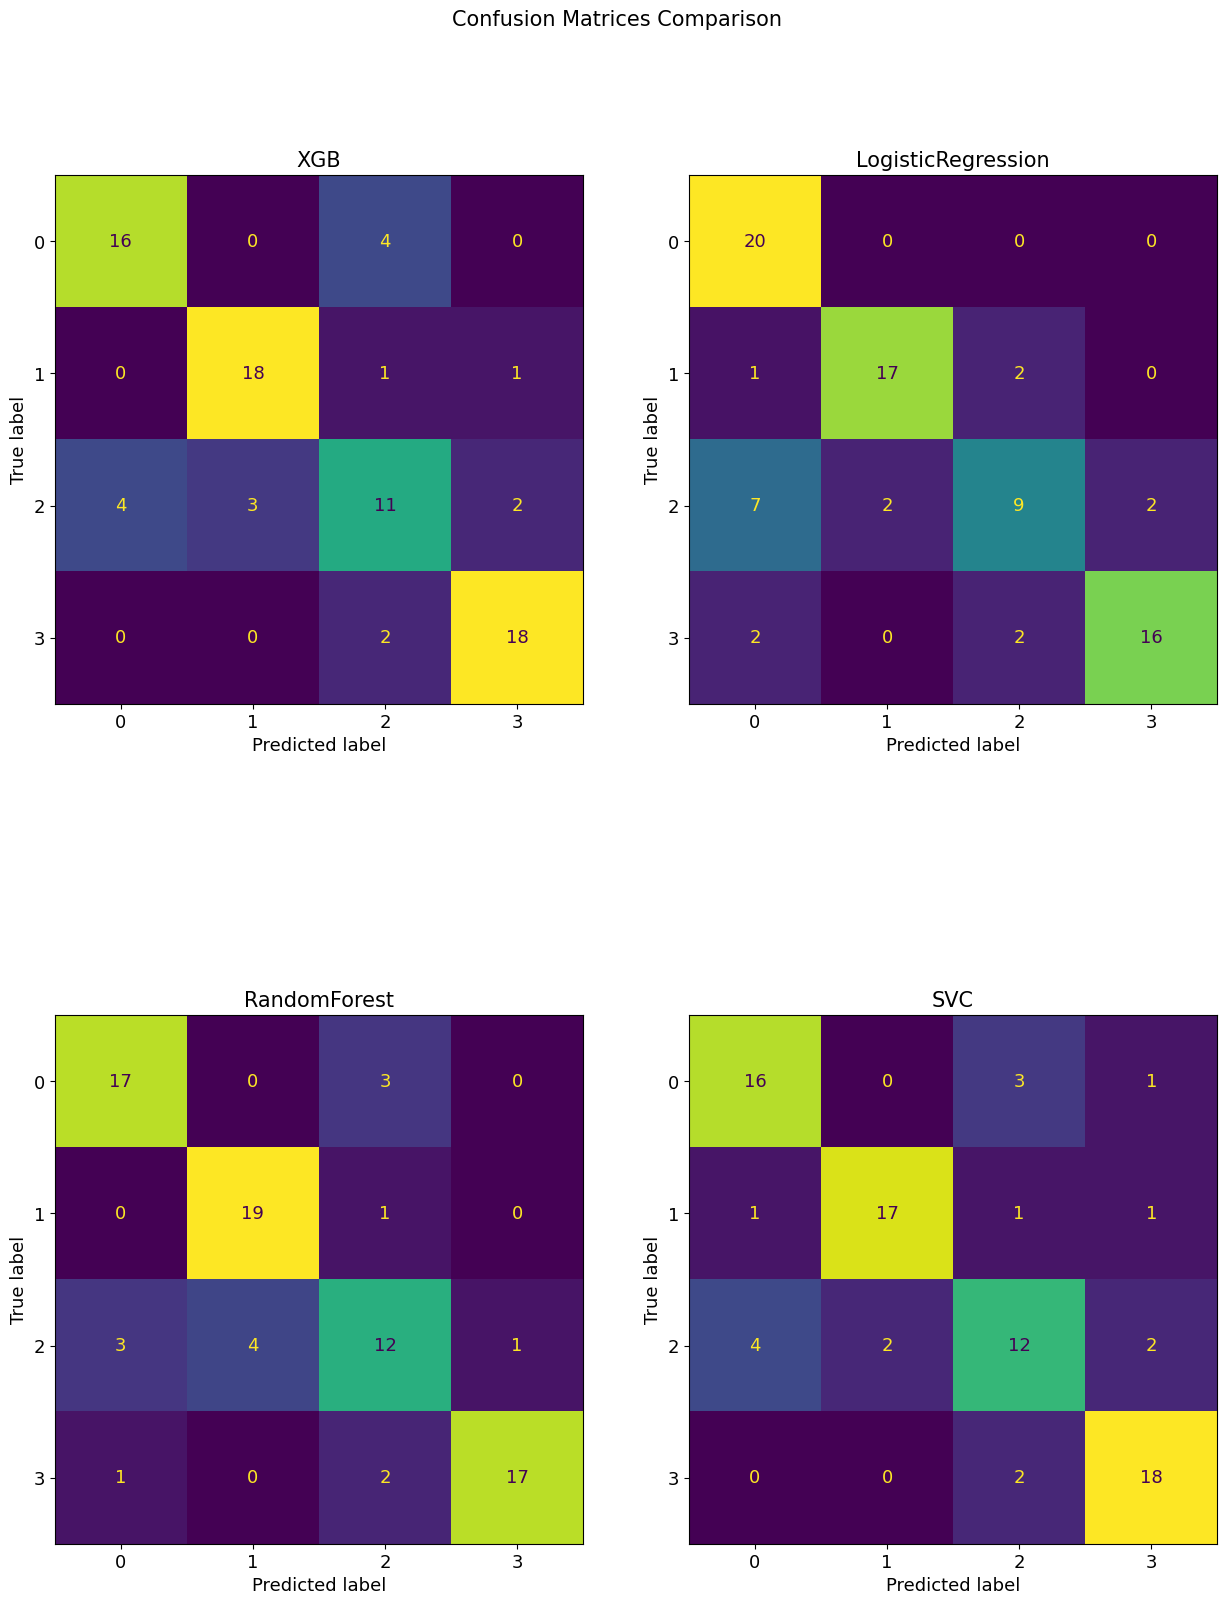

In [75]:
title_size = 15
plt.rcParams.update({"font.size": 13})
color_map = "viridis"
colorbar = False

# Subplots
f, axes = plt.subplots(2, 2, figsize = (15, 20))

for i, j in np.ndindex(axes.shape):
    
    if [i, j] == [2, 1]:
        axes[i, j].set_title(model_names[2*i + j], size = title_size)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm_list[2*i + j], 
                                      display_labels = np.arange(0,3))
        disp.plot(include_values = True, cmap = color_map, ax = axes[i, j], colorbar = colorbar)
    else:
        axes[i, j].set_title(model_names[2*i + j], size = title_size)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm_list[2*i + j], 
                                      display_labels = clf_list[2*i + j].classes_)
        disp.plot(include_values = True, cmap = color_map, ax = axes[i, j], colorbar = colorbar)
    
f.suptitle("Confusion Matrices Comparison", size = title_size, y=0.92)
plt.show()

# **6.Summary and Conclusion**

The Random Forest model has the best accuracy score on the test set. SVC, XGB and Logistic Regression models follow in order.

As can be seen from the confusion matrices, all models have difficulties on predict sad emotion. However, the Random Forest model predicts emotions more correctly than other models.